<a href="https://colab.research.google.com/github/juniorcavicchioli/checkpoint01-aprendizado-de-maquina/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv('aptos.csv', encoding='UTF-8', sep=",")
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- Metros......... área em metros do apartamento;
- Valor............. preço do imóvel dividivo por 100.000;
- Quartos........ número de quartos;
- Vagas........... número de vagas de garagem;
- Reformado... se foi reformado ou não;
- Bairro............ bairro em que o imóvel se encontra.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Eu acho que o imóvel fica mais caro de acordo com o tamanho.
2.  Eu acho que um imóvel com mais garagens fica mais caro.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
mask = df.isnull().any(axis=1) #  Cria uma máscara booleana que identifica as linhas com valores nulos no DataFrame.
empty_rows = df.loc[mask] # Seleciona as linhas do DataFrame df que correspondem aos índices da série booleana mask e as armazena em um novo DataFrame chamado empty_rows.
print(empty_rows)

    metros  valor  quartos  vagas  reformado    bairro
64     120    NaN        3      4        0.0    Centro
91      52  276.0        1      1        NaN  Assuncao


Há dados faltantes. Um em valor e um em reformado. Vou limpá-los para que não influenciem

In [ ]:
df = df.dropna()

In [ ]:
df

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,Centro
110,56,247.0,2,1,0.0,Planalto
111,126,736.0,3,3,0.0,Iraja
112,96,560.0,3,1,0.0,Centro


Para verificar se existem outliers, vou usar o boxplot

Outliers_metros:  [199]
Outliers_vagas:  [4 4 4]


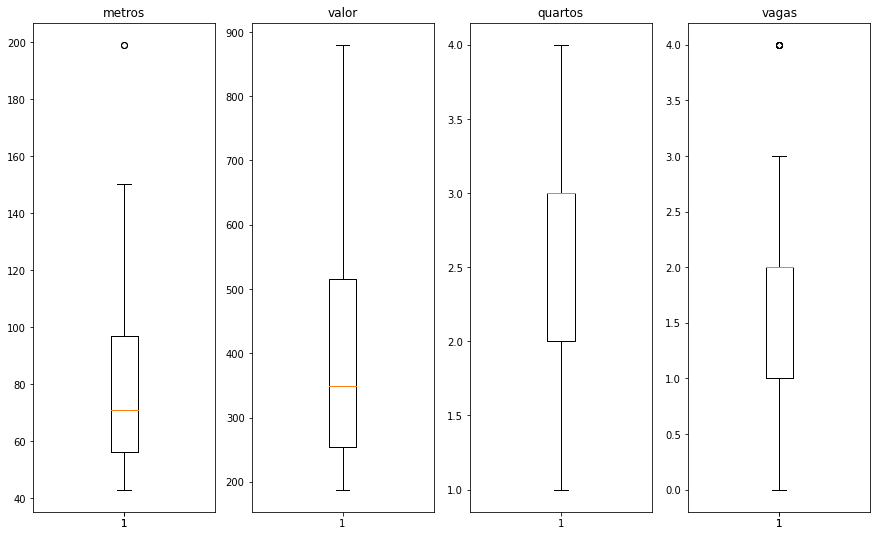

In [ ]:
fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(1, 4, figsize=(15, 9))

ax1.boxplot(df['metros'])
ax1.set_title('metros')

ax2.boxplot(df['valor'])
ax2.set_title('valor')

ax3.boxplot(df['quartos'])
ax3.set_title('quartos')

ax4.boxplot(df['vagas'])
ax4.set_title('vagas')

# exibir os outliers de metros
outliers_metros = ax1.boxplot(df['metros'])['fliers'][0].get_data()[1]
outliers_vagas = ax4.boxplot(df['vagas'])['fliers'][0].get_data()[1]
print("Outliers_metros: ", outliers_metros)
print("Outliers_vagas: ", outliers_vagas)

In [ ]:
df['bairro'].value_counts()

Centro             34
Baeta Neves        17
Assuncao            9
Rudge Ramos         9
Vila Lusitania      6
Planalto            5
Demarchi            5
Ferrazopolis        4
Taboao              4
Santa Teresinha     4
Independencia       3
Nova Petropolis     3
Iraja               3
Pauliceia           2
Jardim do Mar       2
Jordanopolis        1
Piraporinha         1
Name: bairro, dtype: int64

In [ ]:
df = df.drop(1, axis=0) # axis=0 indica que está apagando uma linha
print(df)

     metros  valor  quartos  vagas  reformado          bairro
0       107  560.0        3      2        0.0  Vila Lusitania
2        49  196.0        2      1        0.0    Ferrazopolis
3       104  515.0        3      2        1.0          Centro
4        92  560.0        3      2        1.0  Vila Lusitania
5        51  249.0        2      1        0.0          Taboao
..      ...    ...      ...    ...        ...             ...
109      65  340.0        2      2        1.0          Centro
110      56  247.0        2      1        0.0        Planalto
111     126  736.0        3      3        0.0           Iraja
112      96  560.0        3      1        0.0          Centro
113     103  667.0        3      3        0.0     Baeta Neves

[111 rows x 6 columns]


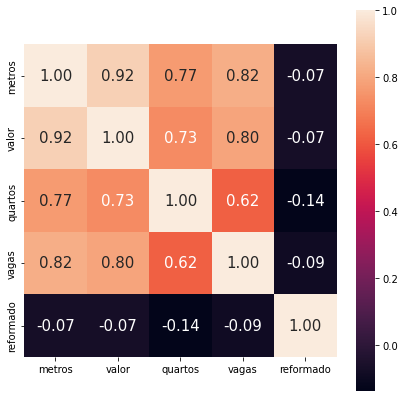

In [ ]:

corr_matx = df[df.columns].corr()
fig, ax = plt.subplots(figsize=(7,7)) 
heatmap = sns.heatmap(corr_matx,annot=True,square=True,fmt='.2f',annot_kws={'size': 15}, ax=ax)

Text(0, 0.5, 'Valor')

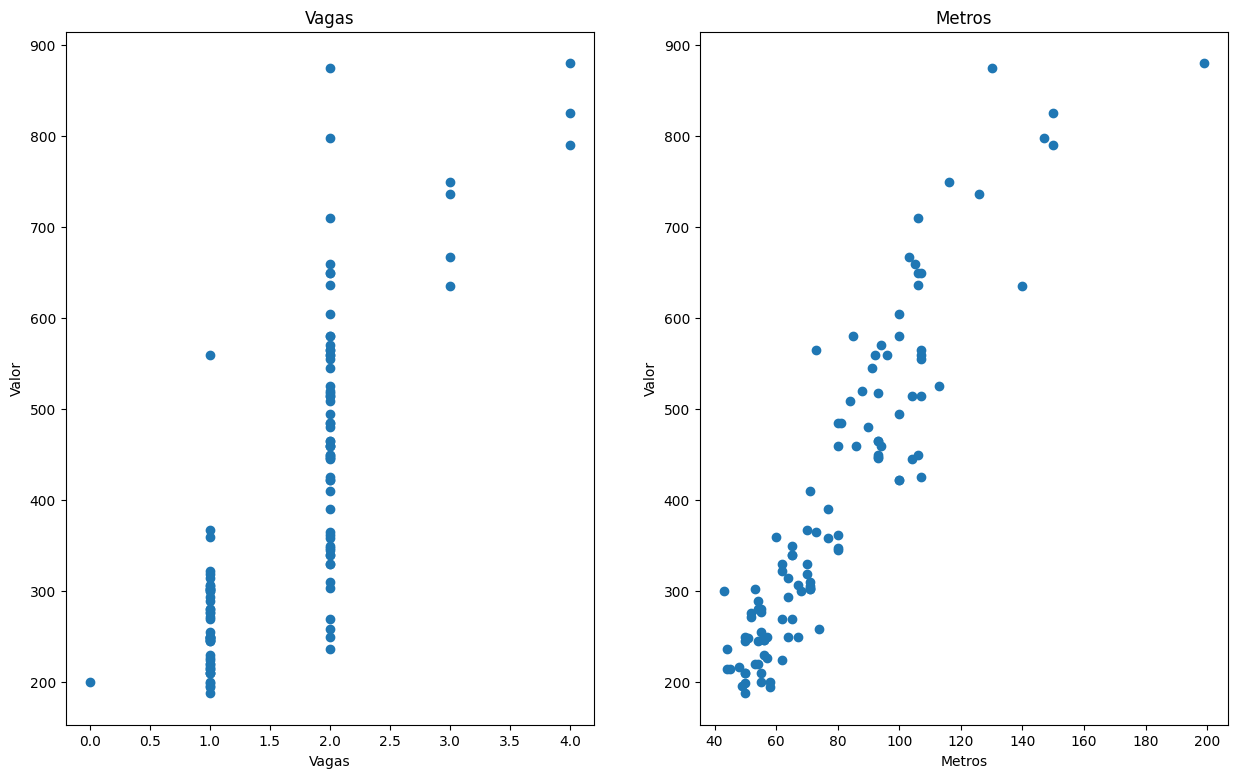

In [9]:
# df.plot.scatter('vagas', 'valor')
# df.plot.scatter('metros', 'valor')
fig, ([ax1, ax2]) = plt.subplots(1,2, figsize=(15,9))

ax1.scatter(df['vagas'], df['valor'])
ax1.set_title('Vagas')
ax1.set_xlabel('Vagas')
ax1.set_ylabel('Valor')

ax2.scatter(df['metros'], df['valor'])
ax2.set_title('Metros')
ax2.set_xlabel('Metros')
ax2.set_ylabel('Valor')

A matriz de correlação diz que as suposições que fiz podem ser verdadeiras com os valores próximos de 1. O valor do imóvel aumenta quando a metragem é maior assim como é com o número de garagens. Os gráficos de dispersão também provam isso.

### Gráfico bonus

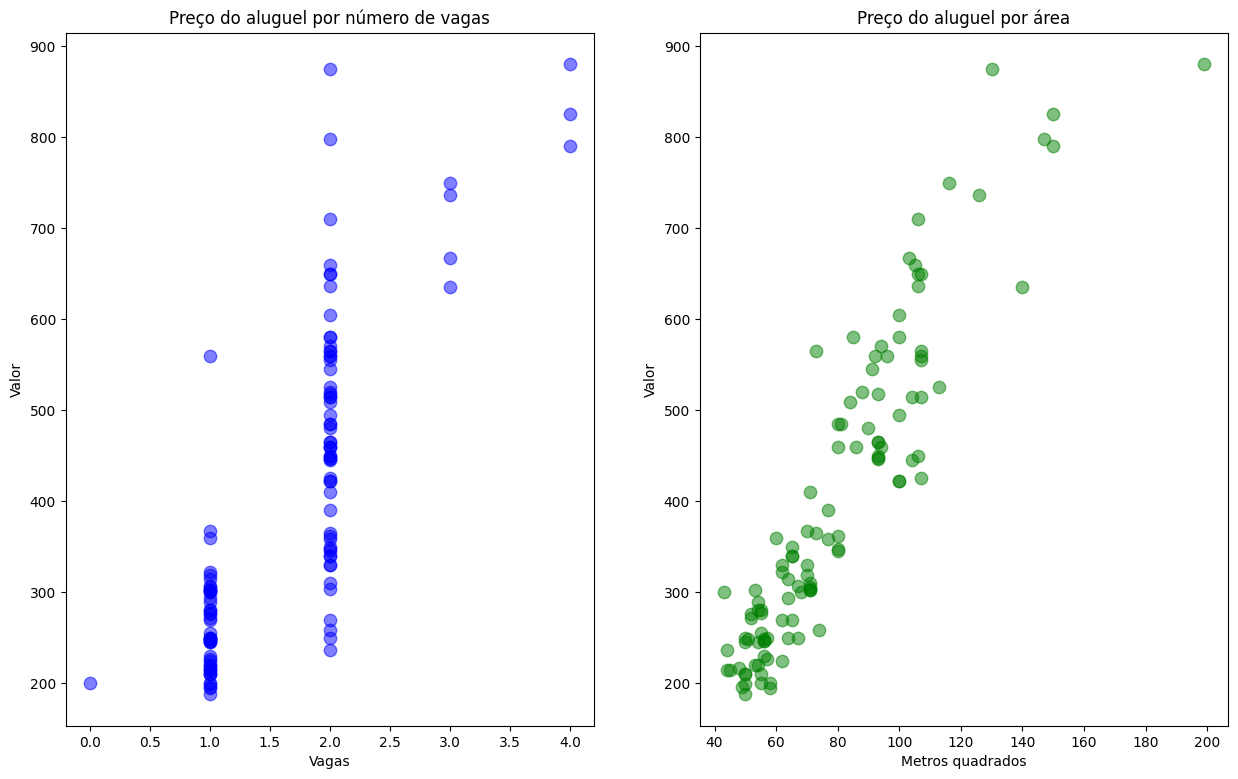

In [8]:
fig, ([ax1, ax2]) = plt.subplots(1,2, figsize=(15,9))

ax1.scatter(df['vagas'], df['valor'], color='blue', alpha=0.5, s=80)
ax1.set_xlabel('Vagas')
ax1.set_ylabel('Valor')
ax1.set_title('Preço do aluguel por número de vagas')

ax2.scatter(df['metros'], df['valor'], color='green', alpha=0.5, s=80)
ax2.set_xlabel('Metros')
ax2.set_ylabel('Valor')
ax2.set_title('Preço do aluguel por área')

plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)?

R: Interpretando o box plot, vemos que existem 1 outlier para `metros` e 3 para `vagas`.

Expandindo a tabela do `df` vemos que outliers de metros é um dos outliers de vagas. Também é possível descobrir facilmente que o `Jardim do Mar` que possui apenas 2 ocorrencias no dataframe faz parte dos outliers restantes de vagas e que todos esses outliers são possuem valores altos (porém não discrepantes) em outras colunas também.

Decidi remover apenas o outlier de metros por ser uma ocorrencia única e ser o valor mais alto existente em todos as colunas e manter os outliers das vagas para não perder completamente todos os valores altos que temos no dataset junto com os únicos valores para o bairro Jardim do Mar.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado
O aprendizado supervisionado é melhor. Temos os valores de entrada e exemplos do valor de saída desejado. No caso, os valores: metros, vagas, quartos, reformado e o bairro são as entradas e desejamos que a nossa máquina seja capaz de prever o valor, que já possuimos exemplos de saída que usaremos para treinar o modelo.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**
Pela interpretação dos gráficos, existe uma linearidade.
1. Regressão linear
2. Random Forest Regressor

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. A regressão linear é um algoritmo que busca traçar uma linha reta que melhor se ajuste aos pontos de um conjunto de dados, de modo a prever uma relação entre uma variável dependente e uma ou mais variáveis independentes.
2. O Random Forest Regressor é um algoritmo de aprendizado de máquina que combina várias árvores de decisão para prever um resultado numérico. Ele funciona criando várias árvores de decisão aleatórias e combinando suas previsões para gerar uma previsão final mais precisa.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
# como não é possível trabalhar com dados que não sejam numéricos, vamos transformar em dados numéricos
df_subset = pd.get_dummies(df, columns=['bairro'])

In [ ]:
df_subset

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,51,249.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# x = df_subset[['quartos', 'vagas', 'metros']]
x = df_subset.drop('valor', axis=1)
y = df_subset['valor']

# separando os dados de treino e de teste em proporções
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1 - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
y_teste_predito = lin_model.predict(x_teste)
y_treino_predito = lin_model.predict(x_treino)

In [ ]:
from sklearn.metrics import r2_score
r2_lin_treino = r2_score(y_true = y_treino, y_pred = y_treino_predito)
r2_lin_teste = r2_score(y_true = y_teste, y_pred = y_teste_predito)

print(f"R2_treino: {r2_lin_treino}\n"
      f"R2_teste: {r2_lin_teste}")

R2_treino: 0.8705084511196816
R2_teste: 0.8151177463596749


Após rodar sem `random_state` definido várias vezes, percebi que o valor de R2 variava muito. Então decidi fazer testes e comparações com valores diferentes e variando a variável `test_size` de uma proporção 80-20 para 70-30

|`random_state`|`test_size`|RS_treino|RS_teste|Diferença|
|:-:|:-:|:-:|:-:|:-:|
|42|0.2|0.87|0.81|0.06
|42|0.3|0.89|0.73|0.13
|100|0.2|0.86|0.86|0
|100|0.3|0.85|0.83|0.02
|12|0.2|0.87|0.74|0.13
|12|0.3|0.88|0.74|0.14
|1|0.2|0.88|0.76|0.12
|1|0.3|0.88|0.76|0.12
|2|0.2|0.84|0.90|-0.06
|2|0.3|0.85|0.82|0.03
|-|-|-|-|*Diferença média = 0.069*|

### Algoritmo 2 - Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_treino, y_treino)

RandomForestRegressor(random_state=42)

In [ ]:
ry_pred = rfr.predict(x_teste)

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = rfr.predict(x_treino)
r2_train = r2_score(y_treino, y_train_pred)
y_test_pred = rfr.predict(x_teste)
r2_test = r2_score(y_teste, y_test_pred)

print(f"R2_treino: {r2_train}\n"
      f"R2_teste: {r2_test}")

R2_treino: 0.9667831235120884
R2_teste: 0.8576831055611949


O número de arvores, conforme cresce, começa a resultar em valores iguais.

|`n_estimators`|R2_treino|R2_teste|
|:-:|:-:|:-:|
|10|0.95|0.77|
|50|0.96|0.79|
|100|0.96|0.80|
|200|0.96|0.80|
*`random_state` da divisão = 100*

|`random_state`|RS_treino|RS_teste|Diferença|
|:-:|:-:|:-:|:-:|
|42|0.96|0.85|0.11
|100|0.96|0.80|0.16
|12|0.96|0.71|0.25
|1|0.96|0.77|0.19
|2|0.96|0.79|0.17
|-|-|-|*Média = 0.176*|

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

| |Treino|Teste|`random_state`
|:-:|:-:|:-:|:-:
|Linear| 0.86 | 0.86 | 100
|Random Forest|0.96	| 0.85 | 42


**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** Regressão Linear.

O Random Forest me pareceu com overfitting. Todos os resultados de treino eram ótimos, porem na hora do teste eles tinham uma diferença entre 0.10 e 0.20, o que pode significar que ele decorou e não está conseguindo generalizar para predizer os resultados.

Enquanto isso, o Linear não passou de 0.90. O que significa que a predição não está tão boa quanto poderia. Apesar disso, confio mais nos resultados da linear que conseguiu resultados com menos variação entre o treino e o teste. Um dos `random_state` testados obteve uma diferença de quase 0 e outros resultados com diferença de 0.03 e 0.06.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
apartamento = pd.DataFrame({'metros': [72], 'quartos': [2], 'vagas': [2], 'reformado': [1],
                              'bairro_Assuncao': [0], 'bairro_Baeta Neves': [0], 'bairro_Centro': [1],
                              'bairro_Demarchi': [0], 'bairro_Ferrazopolis': [0], 'bairro_Independencia': [0], 
                              'bairro_Iraja': [0], 'bairro_Jardim do Mar': [0],
                              'bairro_Jordanopolis': [0], 'bairro_Nova Petropolis': [0],	'bairro_Pauliceia': [0],
                              'bairro_Piraporinha': [0], 'bairro_Planalto': [0], 'bairro_Rudge Ramos': [0],
                              'bairro_Santa Teresinha': [0], 'bairro_Taboao': [0], 'bairro_Vila Lusitania': [0]})

In [ ]:
lin_predito = lin_model.predict(apartamento)
print(f"Preço com LinearRegressor: {lin_predito[0]}")

rfr_predito = rfr.predict(apartamento)
print(f"Preço com RandomForestRegressor: {rfr_predito[0]}")

Preço com LinearRegressor: 394.3286699019902
Preço com RandomForestRegressor: 370.31666666666655


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique.

**Resposta**: O modelo de regressão linear obteve um resultado satisfatório, apesar de não ótimo. Ele obteve valores um pouco mais confiáveis. Observando os gráfico usados para interpretação, foi visível que existe uma linearidade nas relações dos dados de entrada com o valor, o que traz mais confiabilidade para esse modelo.

Já o modelo de regressão random forest pareceu estar com overfitting, então não considero um resultado satisfatório, apesar de não ter sido de todo ruim

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: A maioria dos bairros não possui imóveis o suficiente além de valores confiáveis e críveis, apenas mais incomuns, serem considerados outliers. Basicamente o dataset é muito pequeno para o que foi proposto. Talvez se desconsiderasse o bairro a máquina tivesse um aprendizado melhor mas sabemos que, na vida real, o bairro afeta o valor de um imóvel então isso não seria uma decisão inteligente.